## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 3</center></h1>
### <h1><center>Important NOTE: In order to get full credit, for every question, you need to provide the details of your work on how to get to a solution or the end of a proof.</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Cole Nockolds</center></h1>
##### <h1><center>Due day: 11:00 pm, Tuesday, 15 October </center></h1>
#### <h1><center>All submission MUST be in pdf format, except codes. All code outputs should be reported in pdf format.</center></h1>

## **Question 1** (Monte Carlo Approximation) (20 points)

In this question, you will estimate pi using Monte-Carlo approximation by two different methods:

1. Method 1: Write a Python program to estimate $\pi$ using Monte-Carlo approximation. Report the number of samples, N (the number of pairs $(x^{(i)}, y^{(i)})$) that allows you to obtain 2 decimal places of accuracy for $\pi$ (that means your result is in the interval $(3.135, 3.145)$). Hint: Drawing samples $(x^{(i)}$, $y^{(i)})$ independently from a uniform distribution $\mathcal{U}[0,1]$, the probability that a point lies inside the circle of radius of 1 is $\pi/4$.
2. Method 2: Notice that using elementary calculus the area of the first quarter of or a disk of radius $1$ can also be computed as
$$\frac{\pi}{4} = \int_0^1 \sqrt{1-x^2} dx = \mathbb{E}_{X \sim U [0, 1]}[\sqrt{1-X^2}].$$
Describe how you are going to use the Monte-Carlo method to estimate $\pi/4$ in this case. Write a Python code to estimate $\pi$. Report the number of samples, N, that allow you to obtain 2 decimal places of accuracy for $\pi$.


Comparing the two methods, which approach converges to the requested tolerance with smaller $N$? Explain your answer. Hint: we need to run the experiment for a few hundred individual random seeds. For each random seed, draw 10000 samples. Next, compute the expectation, or the average estimated $\pi$, over all random seeds. Report the variance of each method. 

### 1.1: pi estimate, method 1 (normal dist. sampling)

In [1531]:
# 1.1
import numpy as np
pi = 3.14
def estimate_pi_method_1(N):
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    inside_circle = (x**2 + y**2) <= 1
    pi_estimate = 4 * np.mean(inside_circle)
    return pi_estimate

# Run experiment to find N that gives two decimal places accuracy
def find_N_for_accuracy_method_1(tol=0.005, max_N=1000000):
    N = 100
    while N < max_N:
        pi_estimate = estimate_pi_method_1(N)
        if pi-tol <= pi_estimate <= pi+tol:
            return N, pi_estimate
        N +=1
    return None, None

# Finding N for two decimal places accuracy
N1, pi_estimate1 = find_N_for_accuracy_method_1()
print(f"Method 1: Required samples N = {N1}, Estimated pi = {pi_estimate1}")



Method 1: Required samples N = 121, Estimated pi = 3.1404958677685952


The number of samples required for 2 decimal place accuracy (of predicting pi) is approximately 121.

### 1.2: pi estimate, method 2 (circle)
The Monte-Carlo method is used to estimate the expected value of a function over a certain interval. We estimate the value by sampling a set of points from the interval (such that it follows the probability distribution of the system), and then evaluate the function value. The average represents the expected function value on that interval. In this case, we seek to find the expectation of the function $ f(X) = (1-X^{2})^{\frac {1}{2}} $ over the interval [0,1]. This represents the area of a quarter circle (which is $ \pi/4$). To do this, we sample a uniform distribution between from the interval (we know the system has a uniform probability distribution for the inputs (x value)) for different X values. Then, we compute the value of f(X). The average of these values represents $$\frac{\pi}{4} = \int_0^1 \sqrt{1-x^2} dx = \mathbb{E}_{X \sim U [0, 1]}[\sqrt{1-X^2}].$$ Thus, we only have to multiply the average by 4 to get the $\pi$ estimate.

In [1532]:
#1.2
def estimate_pi_method_2(N):
    x = np.random.uniform(0, 1, N)
    pi_estimate = 4 * np.mean(np.sqrt(1 - x**2))
    return pi_estimate

# Run experiment to find N that gives two decimal places accuracy
def find_N_for_accuracy_method_2(tol=0.005, max_N=1000000):
    N = 100
    while N < max_N:
        pi_estimate = estimate_pi_method_2(N)
        if pi-tol <= pi_estimate <= pi+tol:
            return N, pi_estimate
        N +=1
    return None, None

# Finding N for two decimal places accuracy
N2, pi_estimate2 = find_N_for_accuracy_method_2()
print(f"Method 2: Required samples N = {N2}, Estimated pi = {pi_estimate2}")


Method 2: Required samples N = 111, Estimated pi = 3.143672105551483


To get an accuracy of 2 decimal places when estimating $\pi$, we need about 108 samples.

### 1.3: method 1 vs method 2 convergence analysis

In [1533]:
# 1.3: comparision
def compare_methods(num_trials=500, N=10000):
    method_1_estimates = []
    method_2_estimates = []

    for _ in range(num_trials):
        method_1_estimates.append(estimate_pi_method_1(N))
        method_2_estimates.append(estimate_pi_method_2(N))

    # Calculate mean and variance of both methods
    method_1_mean = np.mean(method_1_estimates)
    method_1_variance = np.var(method_1_estimates)
    method_2_mean = np.mean(method_2_estimates)
    method_2_variance = np.var(method_2_estimates)

    print(f"Method 1: Mean estimate = {method_1_mean}, Variance = {method_1_variance}")
    print(f"Method 2: Mean estimate = {method_2_mean}, Variance = {method_2_variance}")

# Compare both methods
compare_methods()


Method 1: Mean estimate = 3.1424727999999997, Variance = 0.0002568551801599998
Method 2: Mean estimate = 3.141283422990604, Variance = 7.92306530407399e-05


Method 2 converges faster to decimal places (it requires about 89% of the number iterations than method 1 to converge to about the same accuracy tolerance). By using the factual calculus definition of the integral of $ \sqrt{1-x^{2}} $, method 2 directly describes the shape of a quarter circle; this is a precise and concrete definition to determine/approximate $\pi$. Method 2 is gives a smooth and gradual approximation of the area under a curve; each sample reflects a part of the circles curve and does not rely on point inclusion like method 1. \

Meanwhile, method 1 relies on just a geometric approach of arbitrarily selecting points and checking a binary value (whether or not the points lie within the circle); the estimation depends heavily on the random placement of points, which cannot be ensured to be uniform. This method has more fluctuations between trials; some trials may show choose more points within the circle, while other trials may have fewer. As expected (we see below), this leads to a more unstable method (high variance). Also note that each point/sample contributes less information towards the system; we only have a binary true/false value while in method 2, we have a scalar value of the function. Logically, we then know that method 2 should lead to a more stable (although accuracy is not ensured) result.

Method 1: Mean estimate = $3.1408$, Variance = $2.76 * 10^{-4}$ \
Method 2: Mean estimate = $3.1418$, Variance = $8.05 \times 10^{-5}$

## **Question 2** (Probabilistic Regression) (30 points)

Consider a function $$y = f(x) = a_4x^4 + a_3x^3 + a_2x^2 + a_1x + a_0$$ $$[a_0,a_1,a_2, a_3, a_4] = [0.5, -1.0, -0.5, -2.0, 5.0]$$ 
First, generate N noisy data samples by the following process. 

1. Select N and $\delta$ (These are entirely your choice).
2. Draw N Gaussian distributed samples $x^{(i)} \sim \mathcal{N}(0, 2)$.
3. Generate noisy y data by the formula $y^{(i)} = f(x^{(i)}) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \delta^2)$.


(i) Use the Gaussian likelihood model with polynomial regression of order $10$ for the conditional distribution of $y$ given $x$ and $\boldsymbol{\theta}$ 
$$P(y |x, \boldsymbol{\theta}).$$ 
Here, use $\sigma = \delta$. From the N samples of $(x^{(i)}, y^{(i)}), i =1,...,N$, find the optimal $\boldsymbol{\theta}^*$ by the maximum conditional likelihood function approach. Do this by, first, deriving the correct optimization problem, then solving the problem using python.

(ii) Determine the mean of conditional distribution $P( y | x, \boldsymbol{\theta}^*)$ as a function of x. Plot this mean together with the training data.

(iii) Find (analytically) the variance of conditional distribution $$P( y |x, \boldsymbol{\theta}^*).$$ Plot the curves for ($y \pm \sigma$) on top of your figure from (ii).

(iv) Now, draw $x^{(i)} \sim \mathcal{N}(0, 2)$, for $i=1,...,50$, and then compute $y^{(i)} = f(x^{(i)}) + \epsilon$. Plot these 50 pairs $(x^{(i)}, y^{(i)})$ in the same figure from (iii). What is the percentage of points that are within the uncertainty band? Discuss the result.

(v) From the N samples, $(x^{(i)}, y^{(i)})$, find the optimal $\boldsymbol{\theta}^*$ by optimizing the model using the MAP approach (see Lecture 5b to help you derive the MAP function). The variance for the prior Gaussian distribution of $\boldsymbol{\theta}$ should be a reasonable value as it has the same meaning as a regularization parameter as discussed and derived in class.

(vi) Repeat items (ii), (iii), and (iv) for the MAP approach. Discuss the difference in your results between the two approaches. 

### 2.0: generating data

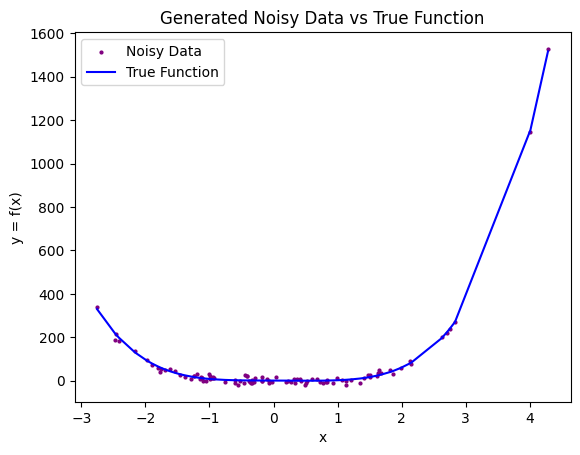

In [1534]:
# 2.0 - pre-processing
import numpy as np
import matplotlib.pyplot as plt
# Given coefficients for the polynomial function
coeffs = [0.5, -1.0, -0.5, -2.0, 5.0]  # [a0, a1, a2, a3, a4]
N = 100  # Number of samples
delta = 10 # standard deviation of noise

# Step 1: Generate x samples from N(0, 2)
x_samples = np.random.normal(0, 2**.5, N) # provide std dev as input

# Step 2: Generate noisy y data
def f(x, coeffs):
    return coeffs[4] * x**4 + coeffs[3] * x**3 + coeffs[2] * x**2 + coeffs[1] * x + coeffs[0]

y_clean = f(x_samples, coeffs)
noise = np.random.normal(0, delta, N) # N(0, delta**2)
y_samples = y_clean + noise

# Plot the generated noisy data
plt.scatter(x_samples, y_samples, label="Noisy Data", color="purple", s = 4)
plt.plot(np.sort(x_samples), f(np.sort(x_samples), coeffs), label="True Function", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Generated Noisy Data vs True Function")
plt.show()


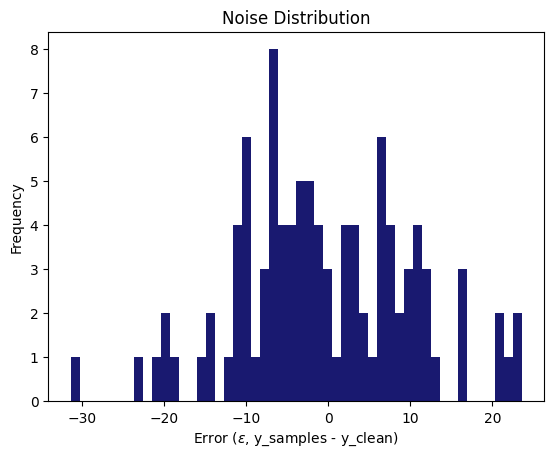

In [1535]:
# 2 - preprocessing, viewing gaussian distribution

plt.hist(y_samples-y_clean,bins = 50, color = "midnightblue")
plt.xlabel(r"Error ($\epsilon$, y_samples - y_clean)")
plt.ylabel("Frequency")
plt.title("Noise Distribution")
plt.show()


### 2.1: Optimal Coefficients with Condtional Maximum Likelihood


#### 2.1, part 1 - determining optimization problem mathematically

Optimal coefficients (theta): [ 3.18735636e-01 -7.15830491e+00 -3.31962567e+00  2.99668261e+00
  7.57446489e+00 -1.53125559e+00 -6.17613424e-01  2.87814206e-01
  2.76523994e-02 -2.15129808e-02  2.18686166e-03]


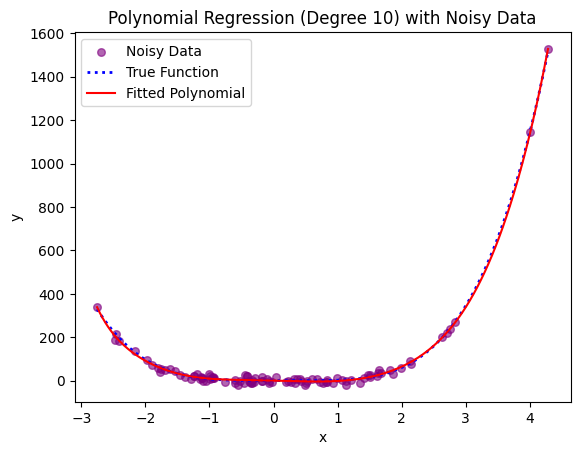

In [1569]:
#2.1, part 2 (python implementation)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Polynomial regression of degree 10
degree=10
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x_samples.reshape(-1, 1))  # create polynomial features

# Fit the model using Linear Regression (solves the least squares problem)
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y_samples)

# Get the optimal coefficients (theta)
theta_optimal = model.coef_
print("Optimal coefficients (theta):", theta_optimal)

# Plot the true polynomial and the fitted polynomial
x_plot = np.linspace(min(x_samples), max(x_samples), 500)
y_plot_true = f(x_plot, coeffs)
y_plot_fitted = model.predict(poly.transform(x_plot.reshape(-1, 1)))


plt.scatter(x_samples, y_samples, label="Noisy Data", color='purple', s=30, alpha = .6)
plt.plot(x_plot, y_plot_true, ":",label="True Function", color='blue',linewidth = 2)
plt.plot(x_plot, y_plot_fitted, label="Fitted Polynomial", color='red')
plt.legend()
plt.title("Polynomial Regression (Degree 10) with Noisy Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Optimal coefficients (theta): 
$$
\theta^{*} \approx \begin{bmatrix}
3.187 \times 10^{-1}  \\
-7.158 \times 10^{0}  \\
-3.320 \times 10^{0}  \\
2.997 \times 10^{0}  \\
7.574 \times 10^{0}  \\
-1.531 \times 10^{0}  \\
-6.176 \times 10^{-1} \\
2.878 \times 10^{-1}  \\
2.765 \times 10^{-2}  \\
-2.151 \times 10^{-2} \\
2.187 \times 10^{-3}  
\end{bmatrix}
$$


### 2.2: Mean of $P(y|x,\theta ^{*})$

# Analytical Mean Derivation

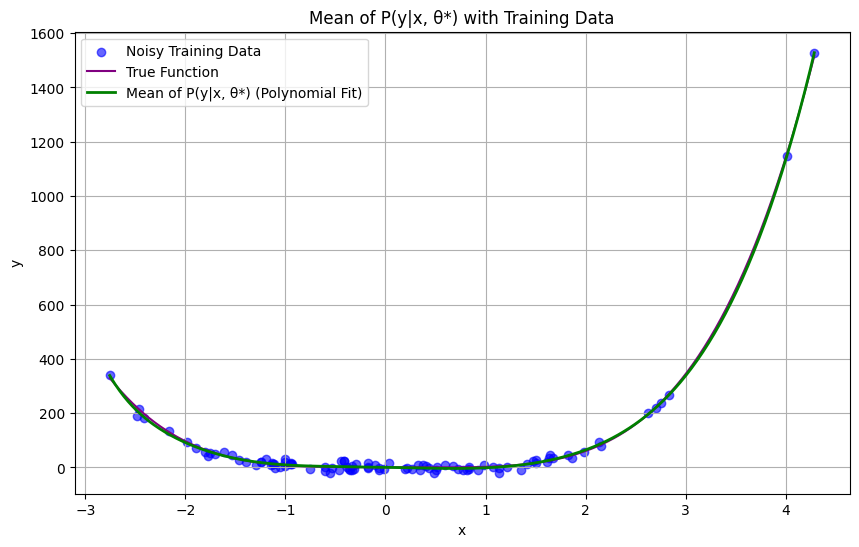

In [1570]:
# 2.ii) - mean of P(y|x, θ*)
y_mean = poly.fit_transform(x_plot.reshape(-1, 1)) @ theta_optimal.T 
plt.figure(figsize=(10, 6))
plt.scatter(x_samples, y_samples, color='blue', label='Noisy Training Data', alpha=0.6)
plt.plot(x_plot, f(x_plot, coeffs), label="True Function", color="purple")
plt.plot(x_plot, y_mean, color='green', label='Mean of P(y|x, θ*) (Polynomial Fit)', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Mean of P(y|x, θ*) with Training Data')
plt.legend()
plt.grid(True)
plt.show()


### 2.3: variance of $P(y|x, \theta ^{*})$

# Analytical Variance Derivation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


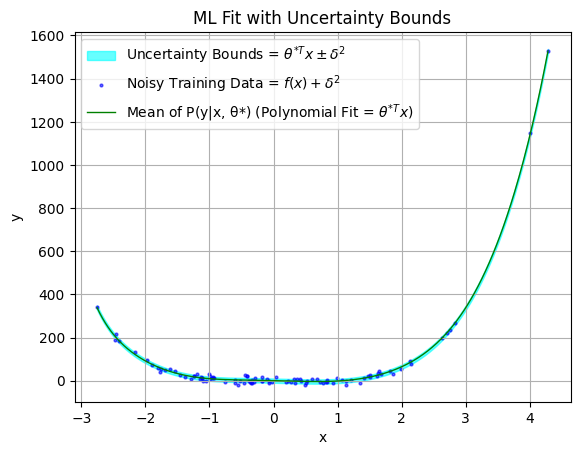

In [1572]:
# 2.3
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot the mean and uncertainty bounds
y_upper = y_mean + delta # note that sigma is the standard deviation; per our analysis, sigma = delta
y_lower = y_mean - delta
plt.fill_between(x_plot, y_lower, y_upper, color="cyan", alpha=0.6, label=r"Uncertainty Bounds = $\theta ^{*T}x \pm \delta^{2}$")
plt.scatter(x_samples, y_samples, color='blue', label=r'Noisy Training Data = $f(x) +\delta ^{2}$', alpha=0.6, s = 4)
plt.plot(x_plot, y_mean, color='green', label=r'Mean of P(y|x, θ*) (Polynomial Fit = $\theta^{*T} x$)', linewidth=1)
plt.legend()
plt.title("ML Fit with Uncertainty Bounds")
plt.show()


### 2.4: new points within uncertainity band

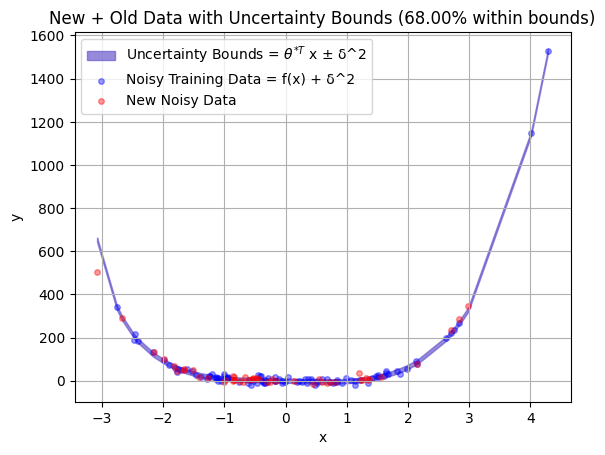

In [1551]:
# 2.4
# Generate new 50 noisy data points
N_new = 50
x_new = np.random.normal(0, 2**.5, N_new)
y_new = f(x_new, coeffs) + np.random.normal(0, delta, N_new) # delta squared?
y_new_mean = poly.fit_transform(x_new.reshape(-1, 1)) @ theta_optimal.T 

# Calculate the percentage of points within the uncertainty bounds
y_nupper = y_new_mean + delta
y_nlower = y_new_mean - delta
within_bounds = np.sum((y_new > y_nlower) & (y_new < y_nupper))
percentage_within_bounds = within_bounds / N_new * 100

# Prepare for plotting
all_x = np.sort(np.hstack((x_samples, x_new))).reshape(-1, 1)
y_all_mean = poly.fit_transform(all_x.reshape(-1, 1)) @ theta_optimal.T 
y_aupper = y_all_mean + delta
y_alower = y_all_mean - delta

# Uncertainty bounds
plt.fill_between(all_x.reshape(all_x.shape[0]), y_alower.reshape(y_alower.shape[0]), y_aupper.reshape(y_aupper.shape[0]), color="slateblue", alpha=0.7, label=r"Uncertainty Bounds = $\theta^{*T}$ x ± δ^2")
plt.scatter(x_samples, y_samples, color='blue', label='Noisy Training Data = f(x) + δ^2', alpha=0.4, s=16)

# Plot the new data points
plt.scatter(x_new, y_new, label="New Noisy Data", color="red", alpha=0.4, s=16)

# Title and labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title(f"New + Old Data with Uncertainty Bounds ({percentage_within_bounds:.2f}% within bounds)")

# Display the plot
plt.show()


We see around 68% of points within the band, which aligns with our expectations. The band represets the mean +/- one standard deviation; for a normal distribution, we expect $\approx 68.26 \%$ of points to lie within $\mu \pm \sigma$, where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation.

To prove that approximately 68\% of the data lies within one standard deviation of the mean for a normal distribution, we will use the properties of the standard normal distribution, which has a mean $ \mu = 0 $ and standard deviation $ \sigma = 1 $.

The probability density function (PDF) of a standard normal distribution is given by:

$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$

This is a bell-shaped curve centered at 0, and the total area under the curve is 1. To find the proportion of points within one standard deviation of the mean, we need to compute the probability that a random point $ x $ lies between $ -1 $ and $ 1 $.

We want to find the following probability:$ P(-1 \leq z \leq 1)$ where $ z $ is a random variable following the standard normal distribution. This probability is given by: $P(-1 \leq z \leq 1) = \int_{-1}^{1} \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} \, dz$
$

This integral cannot be solved analytically in terms of elementary functions, but with computational techniques, we see that $P(-1 \leq z \leq) \approx 0.6826$

Thus, approximately $68.26\% $ of the data points lie within one standard deviation of the mean in a normal distribution.

### 2.5: find the optimal coefficients ($\theta_{MAP}^{*}$) using Maximum A Posteri (MAP) technique

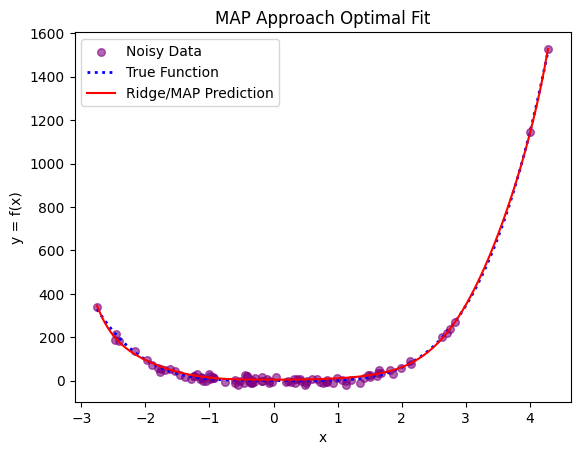

Optimal parameters (theta*): [ 4.42143307  0.3812891   4.02089684 -0.51155735  4.19343679 -1.88487019
 -0.14659748  0.5401712  -0.02413151 -0.04324587  0.00631537]


In [1566]:
#2.5
phi = np.vander(x_samples, degree+1, increasing=True)  # Design matrix

# prior
delta_p = 1.9
lambda_param = delta_p**2 # variance ~= 3.84 regularization

# regularization term based on given formula
D = degree+1 
c1 = np.log(1 / ((2 * np.pi) ** (D / 2) * lambda_param ** D))
c2 = np.log(1 / (delta_p * np.sqrt(2 * np.pi)) ** (-1 / (2 * delta_p ** 2)))
lambda_reg = c1 / c2  # lambda is the ratio of c1/c2

# theta using the Ridge Regression formula
I = np.eye(phi.shape[1])  
theta_star = np.linalg.inv(phi.T @ phi + lambda_reg * I) @ (phi.T @ y_samples)

phi_plot = np.vander(x_plot, D, increasing=True)
y_pred = phi_plot @ theta_star  # Predicted values

plt.scatter(x_samples, y_samples, label="Noisy Data", color="purple", s=30, alpha = .6)

tru = f(np.sort(x_plot),coeffs)
plt.plot(np.sort(x_plot), tru, ":",label="True Function", color="blue", linewidth = 2)

ridg = y_pred[np.argsort(x_plot)]
plt.plot(np.sort(x_plot), ridg, "-",label="Ridge/MAP Prediction", color="red")

# print("Map vs True:", np.linalg.norm(tru-ridg))

plt.legend()
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("MAP Approach Optimal Fit")
plt.show()

print("Optimal parameters (theta*):", theta_star)



Optimal coefficients (theta): 
$$
\theta^{*} \approx \begin{bmatrix}
4.421 \times 10^{0}  \\
3.813 \times 10^{-1} \\
4.021 \times 10^{0}  \\
-5.116 \times 10^{-1} \\
4.193 \times 10^{0}  \\
-1.885 \times 10^{0} \\
-1.466 \times 10^{-1} \\
5.402 \times 10^{-1} \\
-2.413 \times 10^{-2} \\
-4.325 \times 10^{-2} \\
6.315 \times 10^{-3} 
\end{bmatrix}
$$


### 2.6.2: Mean of $P(y|x,\theta ^{*}_{MAP})$

# Analytical Mean Derivation

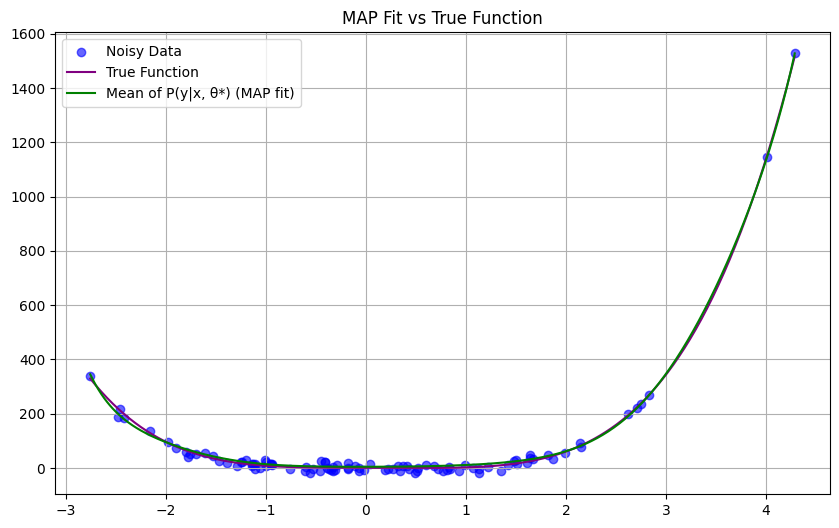

In [1571]:
# 2.6-2    
from sklearn.linear_model import Ridge
plt.figure(figsize=(10, 6))
# Plot the MAP fit
plt.scatter(x_samples, y_samples, label="Noisy Data", color="blue", alpha = .6)
y_act_pred = poly.fit_transform(x_plot.reshape(-1,1)) @ theta_star.T 
plt.plot(x_plot, f(x_plot, coeffs), label="True Function", color="purple")
plt.plot(x_plot, y_act_pred,label="Mean of P(y|x, θ*) (MAP fit)", color="green")

# print("Norm diff of True Function and Ridge Prediction:", np.linalg.norm(f(x_plot, coeffs)- y_act_pred))
plt.legend()
plt.grid(True)
plt.title("MAP Fit vs True Function")
plt.show()


### 2.6.3: variance of $P(y|x, \theta ^{*}_{MAP})$

# Analytical Variance Derivation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


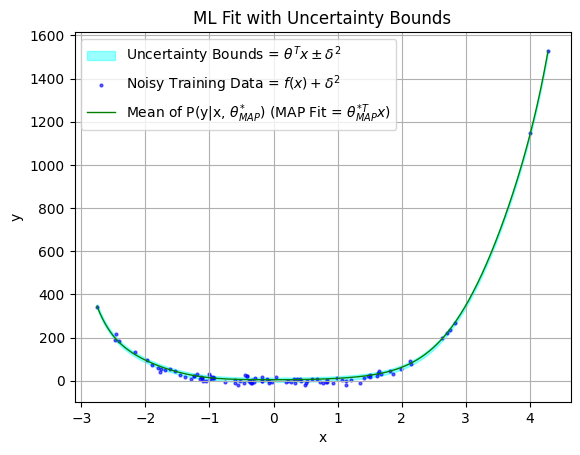

In [1573]:
# 2.6-3
# 2.3
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

y_plot = poly.fit_transform(x_plot.reshape(-1,1)) @ theta_star.T 

# Plot the mean and uncertainty bounds
y_upper = y_plot + delta
y_lower = y_plot - delta


plt.fill_between(x_plot, y_lower, y_upper, color="cyan", alpha=0.4, label=r"Uncertainty Bounds = $\theta ^{T}x \pm \delta^{2}$")
plt.scatter(x_samples, y_samples, color='blue', label=r'Noisy Training Data = $f(x) +\delta ^{2}$', alpha=0.6, s = 4)
plt.plot(x_plot, y_plot, color='green', label=r'Mean of P(y|x, $θ^{*}_{MAP}$) (MAP Fit = $\theta^{*T}_{MAP} x$)', linewidth=1)

plt.legend()
plt.title("ML Fit with Uncertainty Bounds")
plt.show()


### 2.6.4: new points within uncertainity band

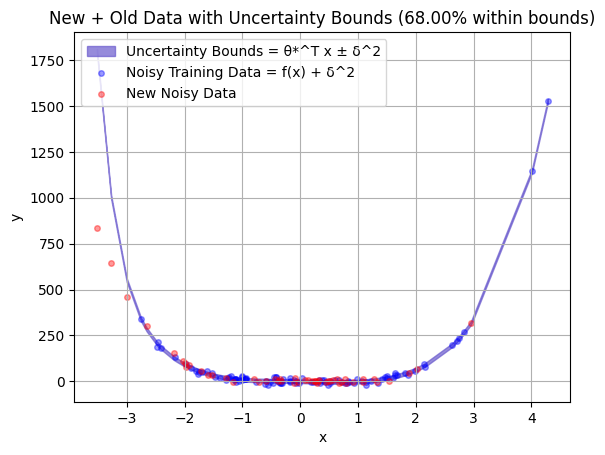

In [1543]:
#2.6.4
# 2.4
# Generate new 50 noisy data points

y_new_pred = poly.fit_transform(x_new.reshape(-1, 1)) @ theta_optimal.T 

# Calculate the percentage of points within the uncertainty bounds
y_nupper = y_new_pred + delta
y_nlower = y_new_pred - delta
within_bounds = np.sum((y_new > y_nlower) & (y_new < y_nupper))
percentage_within_bounds = within_bounds / N_new * 100

# Prepare for plotting
all_x = np.sort(np.hstack((x_samples, x_new))).reshape(-1, 1)
y_act_pred = poly.fit_transform(all_x.reshape(-1, 1)) @ theta_optimal.T 
y_aupper = y_act_pred + delta
y_alower = y_act_pred - delta

# Uncertainty bounds
plt.fill_between(all_x.reshape(all_x.shape[0]), y_alower.reshape(y_alower.shape[0]), y_aupper.reshape(y_aupper.shape[0]), color="slateblue", alpha=0.7, label="Uncertainty Bounds = θ*^T x ± δ^2")

plt.scatter(x_samples, y_samples, color='blue', label='Noisy Training Data = f(x) + δ^2', alpha=0.4, s=16)

# Plot the new data points
plt.scatter(x_new, y_new, label="New Noisy Data", color="red", alpha=0.4, s=16)

# Title and labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title(f"New + Old Data with Uncertainty Bounds ({percentage_within_bounds:.2f}% within bounds)")

# Display the plot
plt.show()


As in part 2.4, we see around 68% of points within the band, which aligns with our expectations. The band represets the mean +/- one standard deviation; for a normal distribution, we expect $\approx 68.26 \%$ of points to lie within $\mu \pm \sigma$, where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation. View 2.4 for more explanation.

## **Question 3** (Logistic Regression) (30 points)

In this problem, you will use regression to classify two types of iris flowers (Iris Versicolour, Iris Virginica) based on 4 features (petal length, petal width, sepal length, sepal width). Recall that for linear regression our model class is given as $$z = \boldsymbol{\theta}^T \boldsymbol{x}$$ where $\boldsymbol{\theta} = [\theta_0, ..., \theta_n]^T$, and $\boldsymbol{x} = [1, x_1, ..., x_n]^T$ with $n$ being the number of input features.
We define the probability of model class $y$, given features $\boldsymbol{x}$, as $$P(y|\boldsymbol{x}, \boldsymbol{\theta}) = \frac{1}{1 + e^{-z}}.$$ For logistic regression, we need to define a loss function to accommodate the nature of the classification problem. Cross entropy loss (derived in class) is a good choice, which is given as $$\mathcal{L}(\boldsymbol{\theta}) = - \frac{1}{N} \sum_{i=1}^{N} y^{(i)} \, \log(P(y^{(i)}|\boldsymbol{x}^{(i)}, \boldsymbol{\theta})) + (1 - y^{(i)}) \, \log(1 - P(y^{(i)}|\boldsymbol{x}^{(i)}, \boldsymbol{\theta}))$$ where $y^{(i)}$ is the label of i-th flower. The label y = 0 corresponds to Iris Versicolour and $y = 1$ corresponds to Iris Virginica. $N$ is the number of training samples. For this problem, N = 80, and the holdout dataset contains 20 samples. The logarithm function has base $e$.

1. Derive the gradient expression of the loss function for logistic regression.

2. Perform logistic regression using the gradient descent code that you wrote in the first homework. You have to decide the initial guess for $\boldsymbol{\theta}$. Plot your classifications on the testing data, circling the wrong prediction points, and report the percentage of misclassifications. See lecture 1 for diabetes risk as an example.

3. Perform logistic regression with L2 regularization using the gradient descent codes that you wrote in the first homework. Choose a reasonable regularization parameter. Plot your classfications on the testing data, circling the wrong prediction points. Report the percentage of misclassifications.

4. Using the scikit-learn LogisticRegression function, perform logistic regression on the data. Compare the results with your result from part 2.

5. Using the scikit-learn LogisticRegression function, perform logistic regression with L2 regularization on the data. Compare the results with your result from part 3.

6. If you acheived different classification results in part 2 and 3, explain the reason why this is the case.

Note: It is fine if you get no misclassifications for the holdout data.

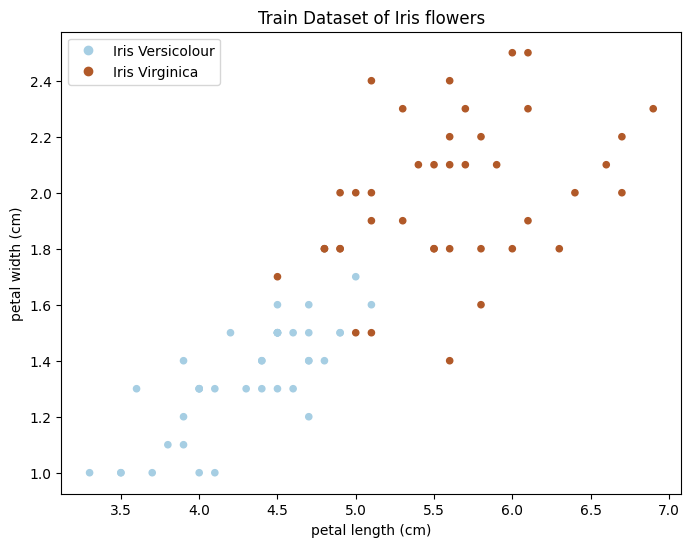

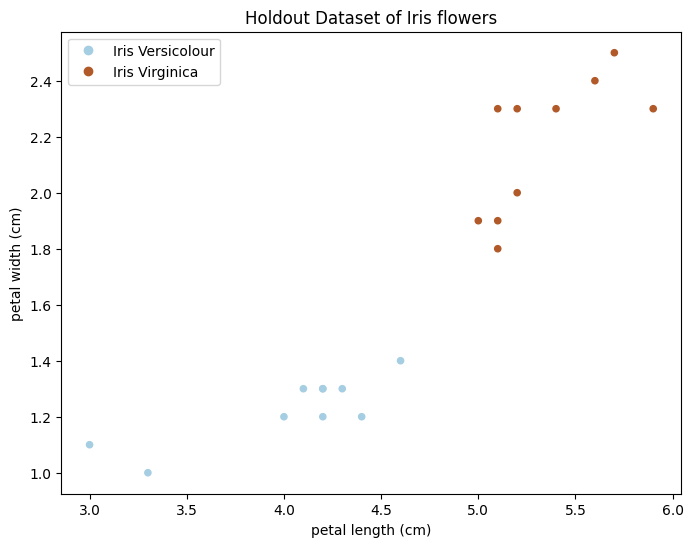

In [1544]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1
X = np.concatenate((iris.data[50:90], iris.data[100:140]), axis = 0)
y = np.concatenate((iris.target[50:90], iris.target[100:140]), axis = 0)

X_holdout = np.concatenate((iris.data[90:100], iris.data[140:150]), axis = 0)
y_holdout = np.concatenate((iris.target[90:100], iris.target[140:150]), axis = 0)

#print(X_holdout.shape, y_holdout.shape)

# # Visualize data
plt.figure(figsize=(8,6))
p1 = plt.scatter(X[:,2], X[:,3], alpha=1, c=y, cmap='Paired', s=20)
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Train Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Versicolour', 'Iris Virginica'])
plt.show()

# Visualize data
plt.figure(figsize=(8,6))
p1 = plt.scatter(X_holdout[:,2], X_holdout[:,3], alpha=1, c=y_holdout, cmap='Paired', s=20)
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Holdout Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Versicolour', 'Iris Virginica'])

### 3.1: Gradient of the Loss Function of Logistic Regression

### 3.2: Logistic Regression w/ Gradient Descent

Final Theta: [-2.3630797  -2.55546724  3.18552012  3.93129208]
Final Error: 0.19005977808307026


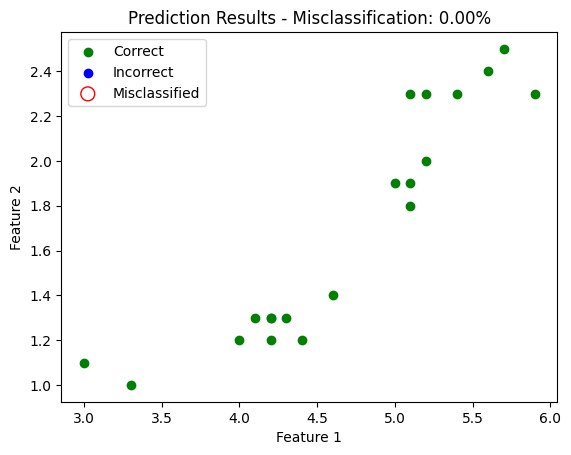

In [1545]:
# 3.2 - logistic regression w/ gradient descent, no regularization

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def error_calc(theta):
    epsilon = 1e-10  # Small value to prevent log(0)
    m = len(y)
    h = sigmoid(X @ theta)
    h = np.clip(h, epsilon, 1 - epsilon)  # Ensure h is in the range (epsilon, 1 - epsilon)
    # print((-1/m) * (y @ np.log(np.eye(h.shape[0])*epsilon) + (np.ones(y.shape[0]) - y) @ np.log(np.eye(h.shape[0]) - np.eye(h.shape[0])*epsilon)))
    return (-1/m) * (y @ np.log(h) + (np.ones(y.shape) - y) @ np.log(np.ones(h.shape) - h))


# Gradient of the error function
def error_grad(theta):
    return (1/len(y)) * (X.T @ (sigmoid(X @ theta) - y))

# Gradient descent function
def grad_descent(theta, max_iter, step_size, tolerance):
    theta_prev = theta
    iter = 0
    thetas = [theta]  
    while iter < max_iter:
        gradient = error_grad(theta)
        theta = theta_prev - step_size * gradient
        thetas.append(theta)
        
        # Check convergence condition
        if np.linalg.norm(theta - theta_prev) < tolerance:
            break

        theta_prev = theta
        iter += 1
    
    return theta, np.array(thetas)


# Parameters
tolerance = 10**(-6)
step_size = 10**(-2)
theta_prev = np.zeros(X.shape[1])

theta_final, all_thetas = grad_descent(np.random.randn(X.shape[1]), 10000, step_size, tolerance)

# Print final results
print("Final Theta:", theta_final)
print("Final Error:", error_calc(theta_final))

predictions = sigmoid(X_holdout @ theta_final) >= 0.5

# Assuming the predictions have been made and you have y_holdout (true labels) and predictions (predicted labels)
def plot_predictions(X_holdout, y_holdout, predictions):
    # Correctly classified points
    correct = predictions == y_holdout
    incorrect = predictions != y_holdout

    # Plot correct predictions
    plt.scatter(X_holdout[correct, 2], X_holdout[correct, 3], color='green', label='Correct')

    # Plot incorrect predictions and circle them
    plt.scatter(X_holdout[incorrect, 2], X_holdout[incorrect, 3], color='blue', label='Incorrect')
    plt.scatter(X_holdout[incorrect, 2], X_holdout[incorrect, 3], facecolors='none', edgecolors='red', s=100, label='Misclassified')

    # Calculate the percentage of misclassifications
    total_points = len(y_holdout)
    misclassified_points = np.sum(incorrect)
    misclassification_percentage = (misclassified_points / total_points) * 100

    # Add title and labels
    plt.title(f"Prediction Results - Misclassification: {misclassification_percentage:.2f}%")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()
plot_predictions(X_holdout, y_holdout, predictions)


We have a 100% prediction accuracy on our test data set (0% misclassification rate).

### 3.3: Logistic Regression w/ Gradient Descent and L2 regularization

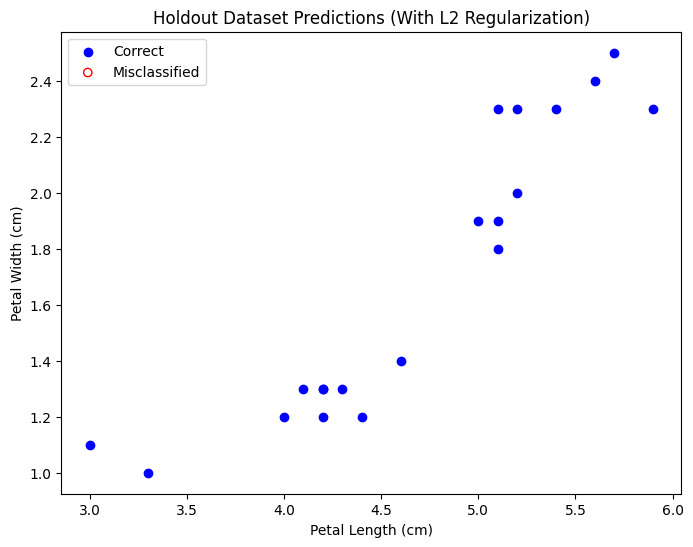

Percentage of misclassifications with L2 regularization: 0.00%


In [1546]:
def compute_loss_with_regularization(theta, lambda_reg):
    m = len(theta) # = len(y)
    reg_term = lambda_reg *np.linalg.norm(theta)**2
    return error_calc(theta) + reg_term

def gradient_descent_with_regularization(X, y, theta, learning_rate=0.01, epochs=10000, tol =1e-7 , lambda_reg = 10**-2):
    m = len(y)
    loss_history = []
    theta_history = np.zeros((epochs,len(theta)))
    for _ in range(epochs):
        if _ >2:
            if np.linalg.norm(theta - theta_history[_-2]) < tol:
                break

        h = sigmoid(X @ theta)
        gradient = (1/m)  * (X.T @ (h - y)) + 2*lambda_reg * theta
        theta -= learning_rate * gradient
        loss_history.append(compute_loss_with_regularization(theta, lambda_reg))
        theta_history[_,:] = theta

    return theta, loss_history

# Initial guess for theta
lambda_reg = 1e-3  # Regularization parameter
theta_final_reg, _ = gradient_descent_with_regularization(X, y, np.random.rand(X.shape[1]), lambda_reg=lambda_reg)

# Make predictions
predictions_reg = sigmoid(X_holdout @ theta_final_reg) >= 0.5
misclassifications_reg = predictions_reg != y_holdout
percentage_misclassified_reg = np.mean(misclassifications_reg) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout[~misclassifications_reg][:, 2], X_holdout[~misclassifications_reg][:,3], c='blue', label='Correct')
plt.scatter(X_holdout[misclassifications_reg][:, 2], X_holdout[misclassifications_reg][:, 3], facecolors='none', edgecolors='red', label='Misclassified')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Holdout Dataset Predictions (With L2 Regularization)")
plt.legend()
plt.show()

print(f"Percentage of misclassifications with L2 regularization: {percentage_misclassified_reg:.2f}%")


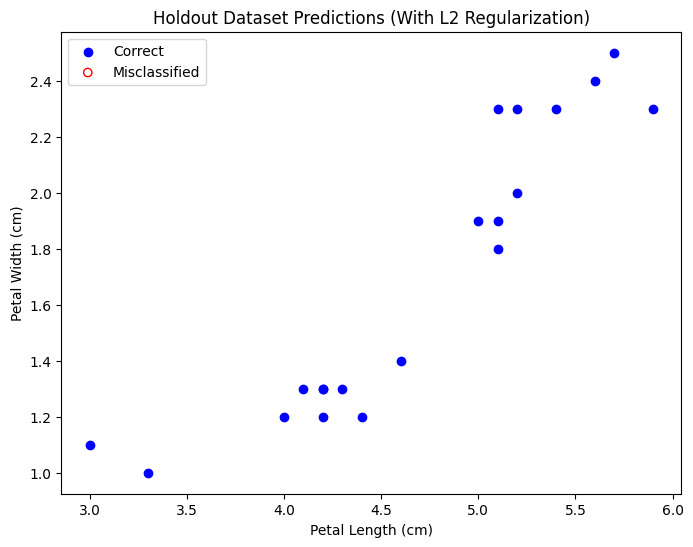

Percentage of misclassifications with L2 regularization: 0.00%


In [1580]:
def compute_loss_with_regularization(X, y, theta, lambda_reg):
    m = len(y)
    h = sigmoid(X @ theta)
    loss = - (1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))
    return loss + reg_term

def gradient_descent_with_regularization(X, y, theta, learning_rate=0.01, epochs=1000, lambda_reg=1.0):
    m = len(y)
    loss_history = []

    for _ in range(epochs):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y)) + (lambda_reg/m) * np.hstack(([0], theta[1:]))
        theta -= learning_rate * gradient
        loss_history.append(compute_loss_with_regularization(X, y, theta, lambda_reg))
    
    return theta, loss_history

# Initial guess for theta
lambda_reg = 1.0  # Regularization parameter
theta_initial = np.random.rand(X.shape[1])
theta_final_reg, _ = gradient_descent_with_regularization(X, y, theta_initial, lambda_reg=lambda_reg)

# Make predictions
predictions_reg = sigmoid(X_holdout @ theta_final_reg) >= 0.5
misclassifications_reg = predictions_reg != y_holdout
percentage_misclassified_reg = np.mean(misclassifications_reg) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout[~misclassifications_reg][:, 2], X_holdout[~misclassifications_reg][:, 3], c='blue', label='Correct') # tilda flips values; selects all X that are not missclasified
plt.scatter(X_holdout[misclassifications_reg][:, 2], X_holdout[misclassifications_reg][:, 3], facecolors='none', edgecolors='red', label='Misclassified')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Holdout Dataset Predictions (With L2 Regularization)")
plt.legend()
plt.show()

print(f"Percentage of misclassifications with L2 regularization: {percentage_misclassified_reg:.2f}%")


We have a 100% prediction accuracy on our test data set (0% misclassification rate).

### 3.4: Logistic Regression w/ scikit

Percentage of misclassifications: 0.00%


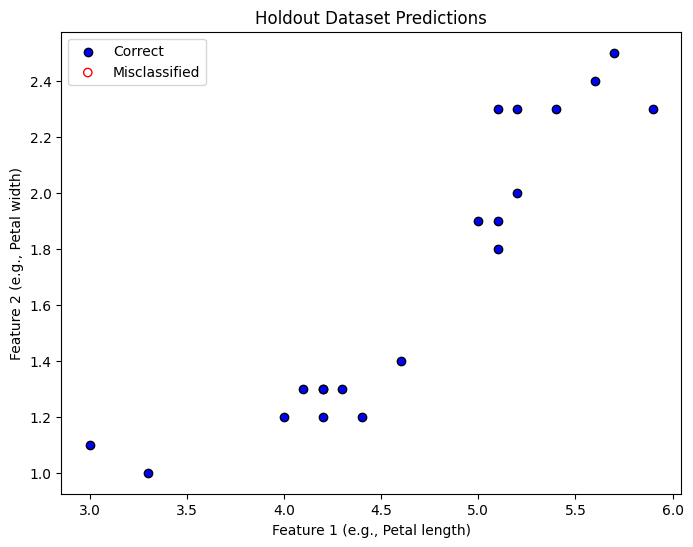

In [1548]:
# 3.4 - logistic regression w/ scikitlearnm, no reg

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5, fit_intercept=True)
logreg.fit(X, y)
# Make predictions on the holdout dataset
predictions_reg = logreg.predict(X_holdout)

# Calculate misclassifications
misclassifications_reg = predictions_reg != y_holdout
percentage_misclassified_reg = np.mean(misclassifications_reg) * 100

# Print results
print(f"Percentage of misclassifications: {percentage_misclassified_reg:.2f}%")

# Optional: Visualize predictions on the holdout dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout[~misclassifications_reg][:, 2], X_holdout[~misclassifications_reg][:, 3], c='blue', label='Correct', edgecolors='k')
plt.scatter(X_holdout[misclassifications_reg][:, 2], X_holdout[misclassifications_reg][:, 3], facecolors='none', edgecolors='red', label='Misclassified')
plt.xlabel('Feature 1 (e.g., Petal length)')
plt.ylabel('Feature 2 (e.g., Petal width)')
plt.title('Holdout Dataset Predictions')
plt.legend()
plt.show()


We have the same 100% accuracy (0% missclassification rate) as before. So, for the given training/testing dataset, the results are identical. We need a larger testing set to report a possibly non-zero missclassification rate for either of the methods (gradient descent on logistic regression that we implement vs. the scikit learn logistic regression).

### 3.5: Logistic Regression w/ scikit and L2 regularization

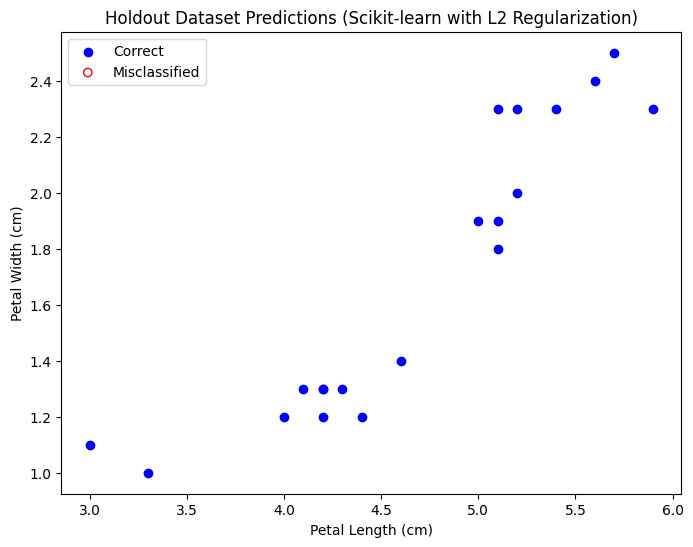

Percentage of misclassifications using scikit-learn with L2 regularization: 0.00%


In [1549]:
# 3.5 - logistic regression w/ scikitlearn, L2 regularization
model_reg = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2', C=1.0)  # C is the inverse of regularization strength
model_reg.fit(X, y)  # Exclude the intercept term

# Predictions and misclassifications
sklearn_predictions_reg = model_reg.predict(X_holdout)
sklearn_misclassifications_reg = sklearn_predictions_reg != y_holdout
sklearn_percentage_misclassified_reg = np.mean(sklearn_misclassifications_reg) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_holdout[~sklearn_misclassifications_reg][:, 2], X_holdout[~sklearn_misclassifications_reg][:, 3], c='blue', label='Correct')
plt.scatter(X_holdout[sklearn_misclassifications_reg][:, 2], X_holdout[sklearn_misclassifications_reg][:, 3], facecolors='none', edgecolors='red', label='Misclassified')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Holdout Dataset Predictions (Scikit-learn with L2 Regularization)")
plt.legend()
plt.show()

print(f"Percentage of misclassifications using scikit-learn with L2 regularization: {sklearn_percentage_misclassified_reg:.2f}%")


We have the same 100% accuracy (0% missclassification rate) as before. So, for the given training/testing dataset, the results are identical. We need a larger testing set to report a possibly non-zero missclassification rate for either of the methods (gradient descent on logistic regression w/ L2 regularization that we implement vs. the scikit learn logistic regression w/ L2 regularization).

### 3.6: Compare results in logistic regression gradient descent w/ and w/o L2 regularization

For all the methods we test, we see no misclassifications; based on the current testing, we see that the results are identical.